## Bulge Model: Checking that the stellar mass is correct

Plot the SMF for the original model and the new model at a number of redshifts, showing observations overlayed.

In [16]:
#Sets plot defaults
import matplotlib
matplotlib.rcParams['font.size'] = (20)
matplotlib.rcParams['figure.figsize'] = (20,15)

import warnings
warnings.filterwarnings('ignore')

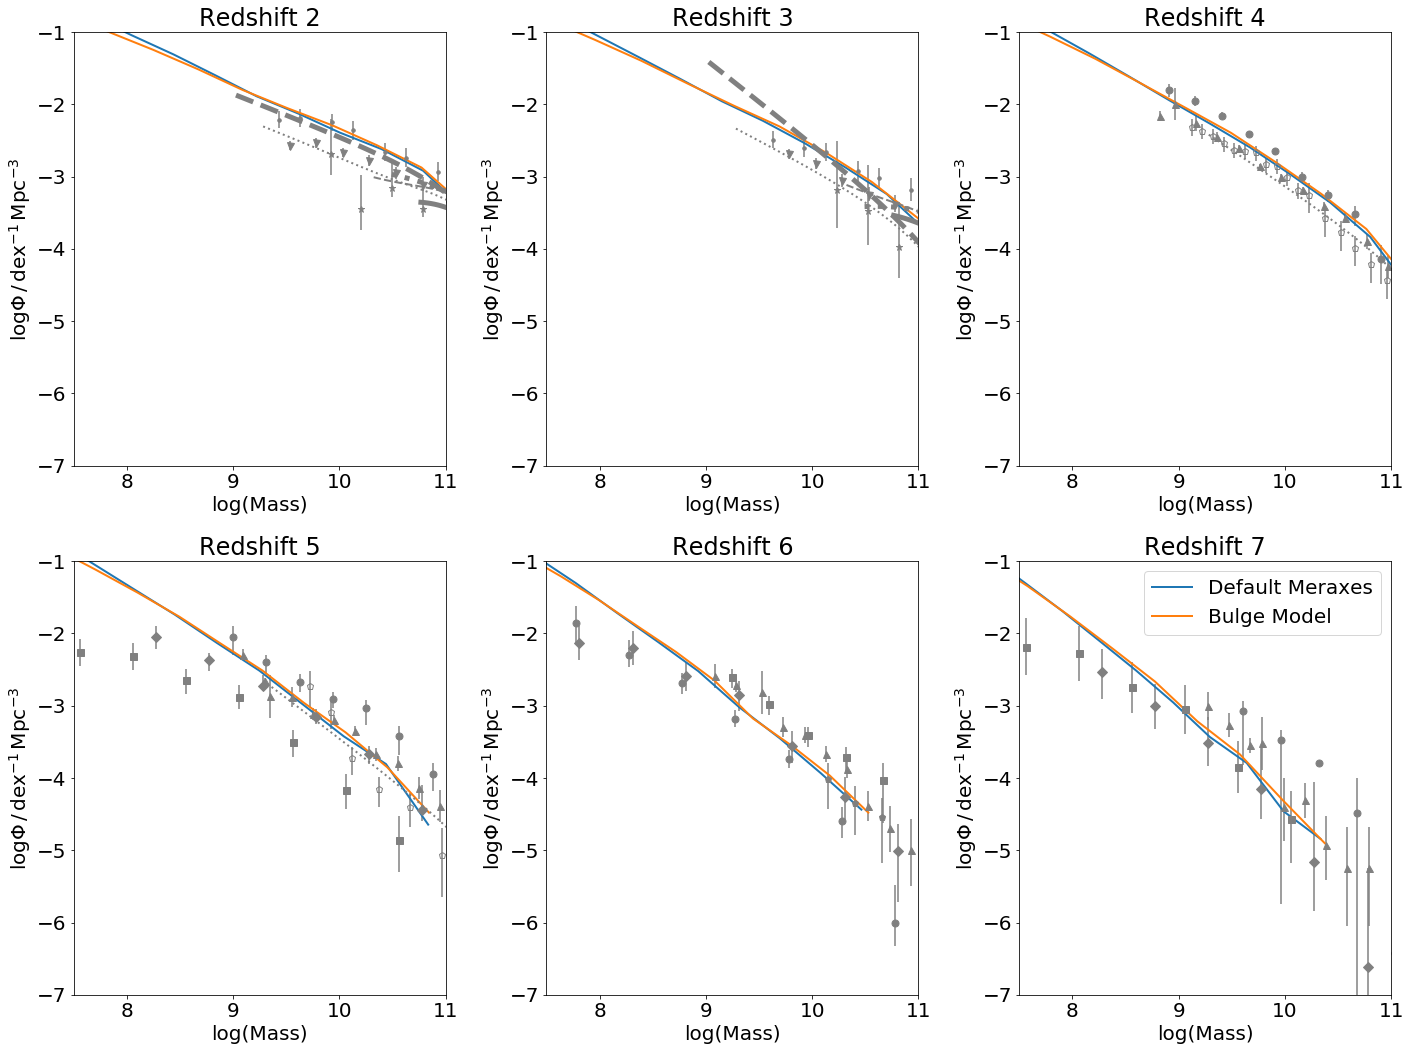

In [17]:
run 'plotSMF.py'

This shows that the SMF from Meraxes on Tiamat is good.

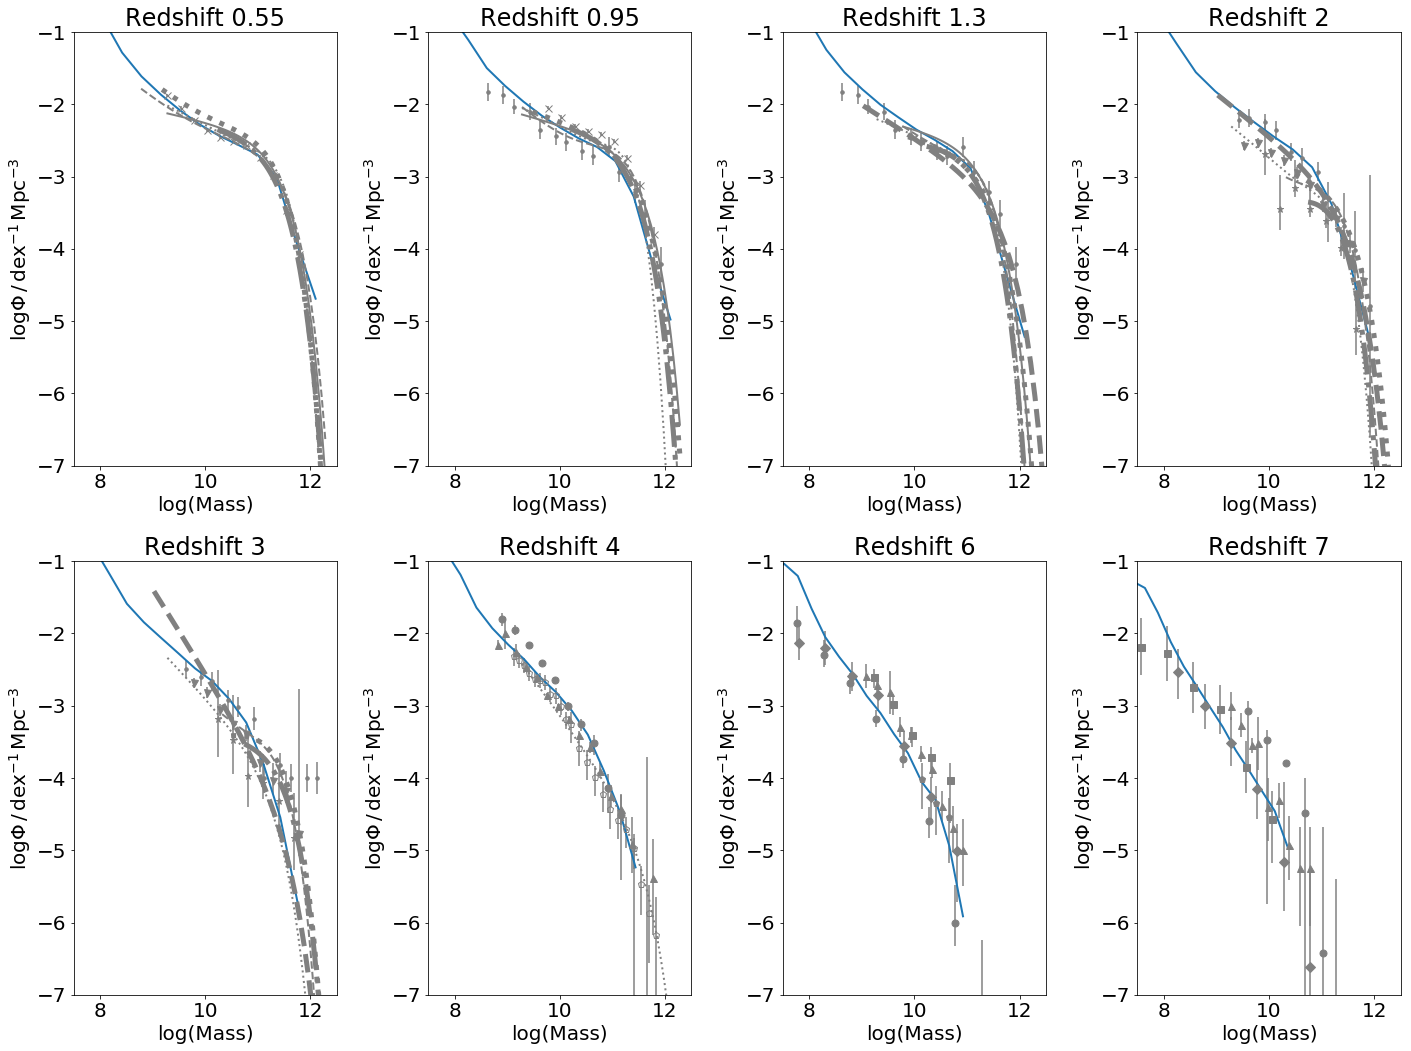

In [18]:
run 'plotSMF_tiamat125.py'

This shows that the SMF from Meraxes on Tiamat-125-HR is also good.

## Checking that the bulge ratio is correct

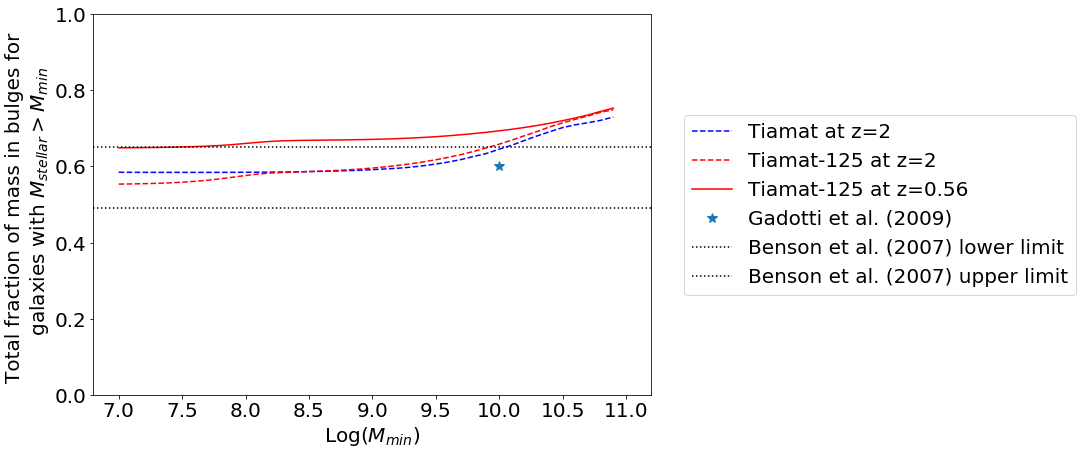

In [26]:
#Sets plot defaults
import matplotlib
matplotlib.rcParams['font.size'] = (20)
matplotlib.rcParams['figure.figsize'] = (10,7)

import numpy as np
from dragons import meraxes
import os
import matplotlib.pyplot as plt
import sys
import ContourPlot as cp

#Setup
cosmo = {'omega_M_0' : 0.308,
'omega_lambda_0' : 0.692,
'omega_b_0' : 0.04839912,
'omega_n_0' : 0.0,
'N_nu' : 0,
'h' : 0.678,
'n' : 0.968,
'sigma_8' : 0.815
}
data_folder='/home/mmarshal/data_dragons/'
meraxes_loc='/output/meraxes.hdf5'

filename='bulges_update1102_full'
snapshot=158
gals=meraxes.io.read_gals(data_folder+filename+meraxes_loc,\
                                          snapshot=snapshot,props=['StellarMass','BulgeStellarMass','GhostFlag','Type'],\
                                          h=cosmo['h'],quiet=True)
gals=gals[gals["GhostFlag"]==0]
gals=gals[gals["Type"]==0]


MaxMass=11.0
MinMass=7.0
BinWidth=0.1
nBins=int(np.ceil((MaxMass-MinMass)/BinWidth))
MedianBulgeFrac=np.zeros(nBins)
TotalBulgeFrac=np.zeros(nBins)
BinStart=np.zeros(nBins)
SM=gals['StellarMass']*1e10
BSM=gals['BulgeStellarMass']*1e10
BulgeFrac=BSM/SM
for ii in range(0,nBins):
  BinStart[ii]=MinMass+ii*BinWidth
  MedianBulgeFrac[ii]=np.median(BulgeFrac[np.log10(SM)>BinStart[ii]])
  TotalBulgeFrac[ii]=sum(BSM[np.log10(SM)>BinStart[ii]])/sum(SM[np.log10(SM)>BinStart[ii]])
#plt.plot(BinStart,MedianBulgeFrac,'b')
plt.plot(BinStart,TotalBulgeFrac,'b--',label='Tiamat at z=2')


##Tiamat 125
filename='bulges_tiamat125'#'bulges_update0925_ddsf'#update0901_ddsf'
snapshot=158#213#
gals=meraxes.io.read_gals(data_folder+filename+meraxes_loc,\
                                          snapshot=snapshot,props=['StellarMass','BulgeStellarMass','GhostFlag','Type'],\
                                          h=cosmo['h'],quiet=True)
gals=gals[gals["GhostFlag"]==0]
gals=gals[gals["Type"]==0]

MedianBulgeFrac=np.zeros(nBins)
TotalBulgeFrac=np.zeros(nBins)
BinStart=np.zeros(nBins)
SM=gals['StellarMass']*1e10
BSM=gals['BulgeStellarMass']*1e10
BulgeFrac=BSM/SM
for ii in range(0,nBins):
  BinStart[ii]=MinMass+ii*BinWidth
  MedianBulgeFrac[ii]=np.median(BulgeFrac[np.log10(SM)>BinStart[ii]])
  TotalBulgeFrac[ii]=sum(BSM[np.log10(SM)>BinStart[ii]])/sum(SM[np.log10(SM)>BinStart[ii]])
#plt.plot(BinStart,MedianBulgeFrac,'r')
plt.plot(BinStart,TotalBulgeFrac,'r--',label='Tiamat-125 at z=2')


filename='bulges_tiamat125'#'bulges_update0925_ddsf'#update0901_ddsf'
snapshot=213#
gals=meraxes.io.read_gals(data_folder+filename+meraxes_loc,\
                                          snapshot=snapshot,props=['StellarMass','BulgeStellarMass','GhostFlag','Type'],\
                                          h=cosmo['h'],quiet=True)
gals=gals[gals["GhostFlag"]==0]
gals=gals[gals["Type"]==0]

MedianBulgeFrac=np.zeros(nBins)
TotalBulgeFrac=np.zeros(nBins)
BinStart=np.zeros(nBins)
SM=gals['StellarMass']*1e10
BSM=gals['BulgeStellarMass']*1e10
BulgeFrac=BSM/SM
for ii in range(0,nBins):
  BinStart[ii]=MinMass+ii*BinWidth
  MedianBulgeFrac[ii]=np.median(BulgeFrac[np.log10(SM)>BinStart[ii]])
  TotalBulgeFrac[ii]=sum(BSM[np.log10(SM)>BinStart[ii]])/sum(SM[np.log10(SM)>BinStart[ii]])
#plt.plot(BinStart,MedianBulgeFrac,'r')
plt.plot(BinStart,TotalBulgeFrac,'r',label='Tiamat-125 at z=0.56')

#Gadotti+09:
plt.plot(10,0.6,'*',markersize=10,label='Gadotti et al. (2009)')
plt.plot([6.8,11.2],[0.49, 0.49],'k:',label='Benson et al. (2007) lower limit')
plt.plot([6.8,11.2],[0.65, 0.65],'k:',label='Benson et al. (2007) upper limit')

plt.xlim([6.8,11.2])
plt.xlabel('Log($M_{min}$)')
plt.ylabel('Total fraction of mass in bulges for \n galaxies with $M_{stellar}>M_{min}$')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.ylim(0,1)
plt.show()

####Fig 2
#EarlyType1=gals[gals['BulgeStellarMass']/gals['StellarMass']>0.9]
#EarlyType2=gals[gals['BulgeStellarMass']/gals['StellarMass']>0.35]
##LateType1=gals[gals['BulgeStellarMass']/gals['StellarMass']<=0.9]
##LateType2=gals[gals['BulgeStellarMass']/gals['StellarMass']<=0.35]

#TotEarlyMass1=np.zeros(nBins)
#TotEarlyMass2=np.zeros(nBins)
#TotMass=np.zeros(nBins)
#for ii in range(0,nBins):
#  BinStart[ii]=MinMass+ii*BinWidth
#  TotEarlyMass1[ii]=sum(EarlyType1[np.log10(EarlyType1['StellarMass']*1e10)>BinStart[ii]]['StellarMass']*1e10)
#  TotEarlyMass2[ii]=sum(EarlyType2[np.log10(EarlyType2['StellarMass']*1e10)>BinStart[ii]]['StellarMass']*1e10)
#  TotMass[ii]=sum(gals[np.log10(gals['StellarMass']*1e10)>BinStart[ii]]['StellarMass']*1e10)
#plt.plot(BinStart,TotEarlyMass1/TotMass)
#plt.plot(BinStart,TotEarlyMass2/TotMass)
#plt.xlabel('Log($M_{min}$)')
#plt.ylabel('Total fraction of mass in early-type galaxies for \n galaxies with $M_{stellar}>M_{min}$')
#plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
#plt.ylim(0,1)
#plt.show()





### Observations: 
#### Gadotti+09
We have performed 2D bulge/bar/disc decompositions using g, r and i-band images of a
representative sample of nearly 1000 galaxies from the Sloan Digital Sky Survey. We provide the structural parameters and distributions
of stellar masses of ellipticals, classical bulges, pseudo-bulges, discs and bars, and find that
32 per cent of the total stellar mass in massive galaxies in the local universe is contained in
ellipticals, 36 per cent in discs, 25 per cent in classical bulges, 3 per cent in pseudo-bulges
and 4 per cent in bars.

Sample:
* 0.02 ≤ z ≤ 0.07.
* Have a volume-limited sample, i.e. a sample which includes all galaxies more massive than $10^{10} M_\ast$ in the volume defined by our redshift cuts and the DR2 footprint.
* Chose objects with an axial ratio b/a ≥ 0.9. This criterion assures us
that our galaxies are very close to face-on, meaning that effects from
dust attenuation, as well as projection effects, are minimized.
* Rejected galaxies with a < 4 arcsec, aswe deemed these galaxies too small for a detailed parametric image
decomposition.
* Get a final sample size of 963

* We thus conclude that, after accounting for the effects introduced with
our axial ratio cut, our final sample is a fair representation of the
population of galaxies and AGN in the local universe with stellar
masses larger than $10^{10} M_\ast$ 

Masses:
* Calculate component masses using mass-to-light ratio
* Uncertainty in component mass fractions is between
1 and 2 per cent points.
* From the total number of galaxies in our sample, 22 per cent are ellipticals, 76 per cent are disc galaxies
with bulges and 2 per cent are bulgeless galaxies (i.e. pure discs).
Within disc galaxies with bulges, 68 per cent host classical bulges,
while 32 per cent have pseudo-bulges. Bars are found in 42 per cent
of all disc galaxies.
* A direct comparison with our results [to the Allen+06 & Driver+07 samples] is difficult, since their sample was not selected with a cut in stellar mass.
As we avoided low-mass galaxies, it is natural to expect that we
find a larger fraction of the local stellar mass in ellipticals, and a
corresponding lower fraction in discs
* In order to try a more meaningful comparison with the results in
Driver et al. (2007a), we can assume that all galaxies with stellar
masses below $10^{10} M_\ast$ are pure discs. This certainly underestimates
the stellar mass content in bars and pseudo-bulges, but can give us
a reasonable assessment of the distribution of stellar mass in discs,
ellipticals and classical bulges, as if we have made no mass cut.
Using the stellar mass function derived by Bell et al. (2003), using
g-band data for a local sample of SDSS galaxies, we find that
22 per cent of the stellar mass in the local universe is in galaxies
with stellar masses below $10^{10} M_\ast$. If all this mass is in discs, then
our local stellar mass budget becomes as follows. Discs contain
50 per cent of the stellar mass, ellipticals contain 25 per cent of
stellar mass, classical bulges and pseudo-bulges contribute with,
respectively, 20 and 2 per cent, and finally bars contain 3 per cent
of the stellar mass. One thus sees a more reasonable agreement,
although we find a somewhat larger mass fraction in ellipticals

#### Benson +07
Obtain quantitative measurements of spheroid-to-disc ratios for a sample of
8839 galaxies observed in the Sloan Digital Sky Survey (SDSS). We find that stars in discs contribute 35–
51 per cent of the local stellar mass density.

Sample:
* z = 0.02 - 0.3
* Catalogue is spectroscopically complete down to r = 17.7


* The mass-to-light ratio is used to convert luminosities to stellar
masses 
* Assume that mass-to-light ratio for spheroid and disk components are the same
* ?? Supposedly plot bulge and disk mass functions but I cannot decipher their legend/figure label

#### Bell +03
We use a large sample of galaxies from the Two Micron All Sky Survey (2MASS) and the Sloan Digital
Sky Survey (SDSS) to calculate galaxy luminosity and stellar mass functions in the local universe.
Accounting for typing uncertainties, we estimate that at least
half, and perhaps as much as 3/4, of the stellar mass in the universe is in early-type galaxies

Sample:
* 13 < r < 17.5
* We adopt as our primary morphological classifier the
r-band concentration parameter


* Determine masses using mass-to-light ratio

Potential early-type definitions: 
* B/T ≥ 0.35 (Simard+17 (https://arxiv.org/pdf/0910.1612.pdf) (Obs))
* B/T ≥ 0.9 (Hoyle+12 (https://arxiv.org/pdf/1110.6320.pdf) (Sims))


* Show luminosity functions split into early-type and late-type

#### Driver +07
We derive the luminosity functions of elliptical galaxies, galaxy bulges, galaxy pseudobulges, and galaxy disks
from our structural catalog of 10,095 galaxies.   In terms of the stellar mass budget we find that
58% is currently in the form of disks, 39% in the form of red spheroids (13% ellipticals,
26% bulges), and the remainder is in the form of blue spheroidal systems (∼1.5% blue ellipticals and ∼1.5%
pseudobulges).

Sample:
* Performed bulge-disk decomposition of all 10,095 galaxies
in the Millennium Galaxy Catalogue
* Original sample had galaxies down to B=20mag, but new magnitude estimates change this
* 0.013 < z < 0.18
* Derive stellar mass densities using colours and magnitudes


* Red spheroids account for 39% of the stellar mass density.